In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
from utils.visualisation import *
import sys
sys.path.append('../')
from helper.DataLoaderMNIST import DataLoader_MNIST
import torchvision.transforms as transforms
import torch
from resnet.model_def import ResNet
from VAE.model_def import VAE

In [2]:
#reimpmort modules with autoreload
%load_ext autoreload
%autoreload 2

print(os.getcwd())

/mnt/c/Users/Hillary Hauger/Documents/Studium/SoSe2024/Case Study Non Linear Optimization/Code/latent-communication/optimization


In [23]:
seed1 = 2
seed2 = 3

"""
config = {
    "path_map":f'ResNet-LinearTransform/Linear_resnet_{seed1}_resnet_{seed2}_100.npy',
    "path_model1": f'../resnet/models/model_seed{seed1}.pth',
    "path_model2": f'../resnet/models/model_seed{seed2}.pth'}
"""
config = {
    "path_map":f'VAE-LinearTransform/Linear_VAE_{seed1}_VAE_{seed2}_100.npy',
    "path_model1": f'../VAE/models/MNIST_VAE_{seed1}_10.pth',
    "path_model2": f'../VAE/models/MNIST_VAE_{seed2}_10.pth'}

In [24]:
#Load mapping
A = np.load(config["path_map"])
#Load models
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model1 = VAE(in_dim=784, dims=[256, 128, 64, 32], distribution_dim=16).to(DEVICE)
model1.load_state_dict(torch.load(config['path_model1'],map_location = DEVICE))

model2= VAE(in_dim=784, dims=[256, 128, 64, 32], distribution_dim=16).to(DEVICE)
model2.load_state_dict(torch.load(config['path_model2'],map_location = DEVICE))

"""
model1 = ResNet(pretrained=False).to(DEVICE)# Load pretrained weights for model2
model1.load_state_dict(torch.load(config['path_model1'],map_location = DEVICE))

model2 = ResNet(pretrained=False).to(DEVICE)# Load pretrained weights for model2
model2.load_state_dict(torch.load(config['path_model2'],map_location = DEVICE))
"""

"\nmodel1 = ResNet(pretrained=False).to(DEVICE)# Load pretrained weights for model2\nmodel1.load_state_dict(torch.load(config['path_model1'],map_location = DEVICE))\n\nmodel2 = ResNet(pretrained=False).to(DEVICE)# Load pretrained weights for model2\nmodel2.load_state_dict(torch.load(config['path_model2'],map_location = DEVICE))\n"

In [25]:
## Get dataloader to plot
# Transformations for resnet
transformation_resnet = [transforms.ToTensor(),
                    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                    ]
# Transdormations for vae
transformation_vae= [transforms.ToTensor(), 
                                # Normalize between -1 and 1
                                transforms.Normalize((0.5,), (0.5,)),
                                # Flatten the Image to a vector
                                transforms.Lambda(lambda x: x.view(-1) )
                                ]

# Load the data
batch_size=256
data_loader = DataLoader_MNIST(batch_size, transformation_vae, transformation_vae)

In [26]:
number_batches_to_plot=100
train_loader1, train_loader2 = data_loader.get_train_loader()
latent_space_model2,all_labels_model2 = get_latent_space_data(model2, train_loader2, DEVICE,number_batches_to_plot)
latent_space_model1,all_labels_model1 = get_latent_space_data(model1, train_loader1, DEVICE,number_batches_to_plot)

## Latent Space visualization with PCA

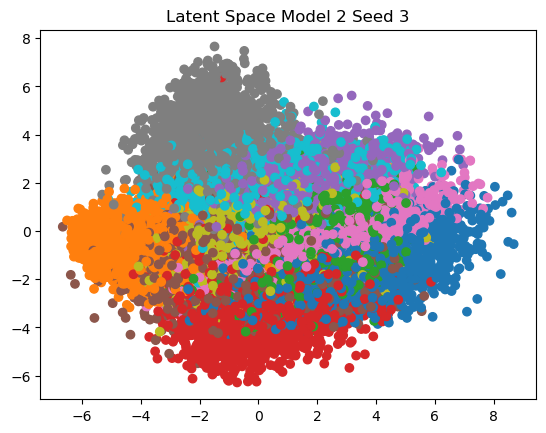

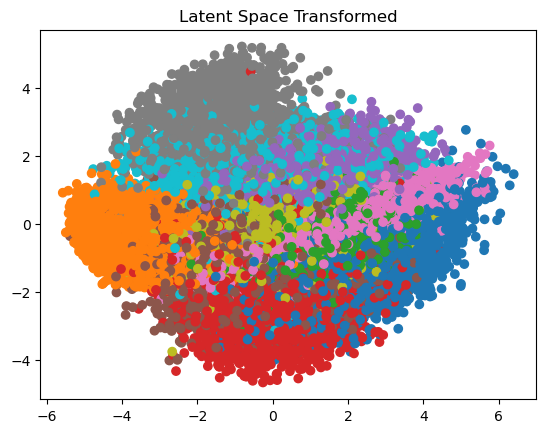

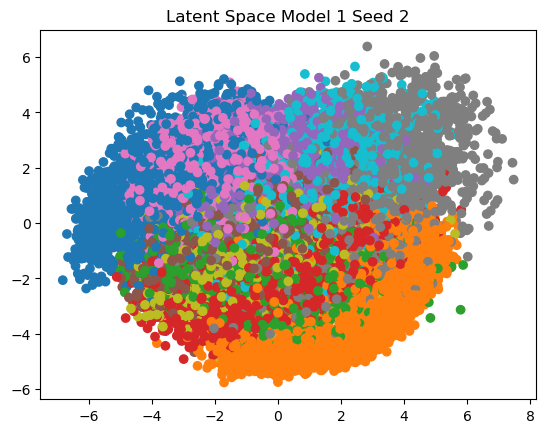

In [27]:
pca_model2 = pca_def(latent_space_model2)
plotLatentTransformed(latent_space_model2,all_labels_model2, np.eye(latent_space_model2.shape[1]), pca_model2, f"Model 2 Seed {seed2}")
plotLatentTransformed(latent_space_model1,all_labels_model1, A, pca_model2, "Transformed")
pca_model1 = pca_def(latent_space_model1)
plotLatentTransformed(latent_space_model1,all_labels_model1, np.eye(latent_space_model1.shape[1]), pca_model1, f"Model 1 Seed {seed1}")

## Distances

In [28]:
print("Average distance transformed and model2: ", avg_transformed_distances(latent_space_model1, latent_space_model2, A))
#print("Average distance model1 and model2: ", avg_transformed_distances(latent_space_model1, latent_space_model2, np.eye(latent_space_model1.shape[1])))

Average distance transformed and model2:  1.733837865213685


In [16]:
A.shape

(32, 32)